# Politica 1

Esta política de evacuación (Política 1) implementa una estrategia de navegación básica que utiliza exclusivamente la información estructural de la ciudad, sin depender de ningún dato de proxy.

# Estrategia principal

La política funciona de la siguiente manera:

1. Intenta encontrar un camino válido desde el nodo inicial hasta cada uno de los nodos de extracción disponibles.
2. Para cada nodo de extracción, calcula el camino más corto usando el algoritmo de Dijkstra (implementado en NetworkX).
3. Para cada camino encontrado, calcula su longitud real sumando los pesos de las aristas.
4. Selecciona el camino con la menor longitud total entre todos los caminos válidos.
5. Si no existe ningún camino hacia los puntos de extracción, la política devuelve solo el nodo inicial.

Para la distribución de recursos, se implementa una estrategia equitativa:
- Los recursos disponibles se dividen en partes iguales entre los tres tipos (explosivos, munición y trajes de radiación)
- Si hay recursos restantes que no pueden dividirse equitativamente, se asignan de manera secuencial

# Lógica detrás de la política

Esta política representa la estrategia de "Los Primeros Días" donde:
1. No hay información disponible sobre condiciones ambientales o amenazas específicas
2. Las decisiones se basan únicamente en la estructura de la ciudad y las distancias
3. Se busca el camino más corto posible, operando bajo la hipótesis de que rutas más cortas implican menor exposición a peligros

La distribución equitativa de recursos refleja la incertidumbre inicial: sin información específica sobre los peligros, es prudente mantener un balance en los recursos para estar preparado ante cualquier escenario.

Esta política establece una línea base simple pero robusta para la evacuación cuando se opera completamente a ciegas, confiando únicamente en el mapa básico de la ciudad.

# Politica 2

Esta política de evacuación (Política 2) implementa una estrategia que utiliza los datos de proxies para encontrar un camino seguro hacia los puntos de extracción, enfocándose específicamente en minimizar el gradiente de peligro.

# Estrategia principal

La política funciona de la siguiente manera:

1. Primero verifica cuáles puntos de extracción son alcanzables desde el nodo inicial.
2. Si no se puede llegar a ningún punto de extracción, la política devuelve solo el nodo inicial.
3. Crea una copia del grafo de la ciudad y modifica los pesos de las aristas basándose en el indicador `hazard_gradient` de cada conexión.
4. La fórmula para el nuevo peso es: `peso_original * (1 + hazard_gradient * 10)`, donde:
   - El factor base (1) preserva el peso original
   - El factor de multiplicación (10) amplifica la influencia del gradiente de peligro
5. Encuentra el camino más corto hacia cada punto de extracción alcanzable usando estos nuevos pesos.
6. Selecciona el camino con el menor costo total (menor exposición acumulada al gradiente de peligro).

Para la distribución de recursos, se implementa una estrategia equitativa:
- Los recursos disponibles se dividen en partes iguales entre los tres tipos (explosivos, munición y trajes de radiación)
- Si hay recursos restantes que no pueden dividirse equitativamente, se asignan secuencialmente

# Lógica detrás de la política

Esta política representa la fase de "Estableciendo la Red de Monitoreo" donde:

1. El `hazard_gradient` se utiliza como indicador crítico porque:
   - Representa cambios bruscos en las condiciones ambientales
   - Los equipos de rescate han identificado que los cambios repentinos en el entorno suelen ser más peligrosos que condiciones adversas constantes
   - Ayuda a evitar zonas donde las condiciones pueden deteriorarse rápidamente

2. A diferencia de la Política 1, esta estrategia:
   - Incorpora información ambiental de los sensores
   - Optimiza las rutas basándose en datos de peligro reales
   - Mantiene la simplicidad en la distribución de recursos mientras mejora significativamente la selección de rutas

Esta política logra un equilibrio entre utilizar la nueva información disponible de los sensores para elegir rutas más seguras, mientras mantiene una asignación de recursos conservadora ante la falta de datos históricos sobre el uso efectivo de cada tipo de recurso.

# Politica 3

Esta política de evacuación (Política 3) implementa un enfoque basado en el análisis de proxies para determinar el camino más seguro hacia los puntos de extracción, con una asignación de recursos dependiente de los problemas encontrados.

# Estrategia principal

La política funciona de la siguiente manera:

1. Se analizan los datos de los nodos y las aristas de la ciudad utilizando PCA para reducir la dimensionalidad de los proxies.
2. Se seleccionan tres proxies representativos para cada tipo de problema (radiación, munición y explosivos).
3. Se establecen umbrales basados en las medias de los valores de los proxies seleccionados, para determinar si un nodo o arista presenta un problema.
4. Se construye un grafo ponderado, donde:
   - Cada nodo recibe un peso equivalente a la cantidad de problemas detectados.
   - Cada arista recibe un peso binario (1 si presenta algún problema, 0 si no lo presenta).
5. Se emplea el algoritmo de Dijkstra para encontrar el camino de menor peso total hacia los puntos de extracción alcanzables.
6. Se elige el camino con la menor exposición acumulada a problemas.
7. Se asignan recursos según los problemas encontrados a lo largo del camino.

# Cálculo de problemas

Se definen umbrales de problemas basados en la media de los valores de los proxies seleccionados:
- **Radiación**: Se asigna un problema si el valor del proxy de radiación excede su umbral.
- **Munición**: Se asigna un problema si el valor del proxy de munición excede su umbral.
- **Explosivos**: Se asigna un problema si el valor del proxy de explosivos excede su umbral.

Cada nodo y arista se evalúa según estos criterios y se asignan pesos en consecuencia.

# Asignación de recursos

Los recursos disponibles se asignan según la cantidad de problemas encontrados en el mejor camino:
- **Trajes de radiación**: Se asigna uno por cada problema de radiación identificado.
- **Munición**: Se asigna una unidad por cada problema térmico identificado.
- **Explosivos**: Se asigna una unidad por cada problema de bloqueo o daño estructural identificado.

Si hay recursos sobrantes, se distribuyen equitativamente entre las tres categorías. Si no es divisible exactamente, se asignan en orden de prioridad.

# Lógica detrás de la política

Esta política mejora la selección de rutas y la asignación de recursos mediante:
- **Uso de PCA**: Reduce la complejidad de los datos y selecciona los proxies más relevantes.
- **Umbrales basados en medias**: Asegura una detección estadísticamente fundamentada de problemas.
- **Optimización de caminos**: Minimiza la exposición acumulada a peligros en la ruta de evacuación.

Al integrar información ambiental con técnicas de reducción de dimensionalidad, esta estrategia ofrece un equilibrio entre precisión y eficiencia en la toma de decisiones bajo condiciones de riesgo.



# Politica 4

Esta política de evacuación implementa un enfoque basado en el análisis de proxies para determinar el camino más seguro hacia los puntos de extracción, con una asignación de recursos dependiente de los problemas encontrados.

# Estrategia principal

La política funciona de la siguiente manera:

1. Se definen umbrales específicos para detectar diferentes tipos de amenazas en la ciudad: lecturas térmicas (zombies), radiación y densidad de escombros.
2. Se construye un grafo ponderado donde:
   - Cada nodo recibe un peso basado en los problemas de radiación y térmicos detectados.
   - Cada arista recibe un peso binario (1 si presenta problemas de escombros, 0 si no).
3. Se emplea el algoritmo de Dijkstra para encontrar el camino de menor peso total hacia cada punto de extracción.
4. Se selecciona el camino con el menor peso acumulado entre todas las rutas posibles.
5. Se asignan recursos específicamente según los problemas encontrados a lo largo del camino elegido.

# Optimización mediante Monte Carlo Tree Search

Los umbrales críticos (THERMAL_THRESHOLD, RADIATION_THRESHOLD, DEBRIS_THRESHOLD) fueron determinados mediante un proceso de Monte Carlo Tree Search (MCTS), que:

1. Exploró sistemáticamente diferentes combinaciones de umbrales en un amplio espacio de búsqueda.
2. Para cada conjunto de valores candidatos, ejecutó múltiples simulaciones en diversas configuraciones de ciudades.
3. Evaluó cada combinación según múltiples métricas: tasa de éxito, eficiencia de recursos y tiempo de evacuación.
4. Refinó iterativamente la búsqueda, concentrándose en las regiones del espacio de parámetros que mostraban mejor desempeño.
5. Convergió hacia los valores óptimos para cada indicador (0.2, 0.18 y 0.27 respectivamente).

Este enfoque nos permitió identificar con precisión los niveles de amenaza significativos sin depender de heurísticas arbitrarias o suposiciones no fundamentadas.

# Cálculo de problemas

A lo largo del camino seleccionado, se contabilizan:
- **Problemas térmicos**: Nodos donde las lecturas térmicas superan el umbral de 0.2.
- **Problemas de radiación**: Nodos donde las lecturas de radiación superan el umbral de 0.18.
- **Problemas de bloqueo**: Aristas donde la densidad de escombros supera el umbral de 0.27.

# Asignación de recursos

Los recursos se asignan con precisión según los problemas identificados:
- **Trajes de radiación**: Uno por cada problema de radiación detectado.
- **Munición**: Una unidad por cada problema térmico (concentración de zombies).
- **Explosivos**: Una unidad por cada problema de bloqueo por escombros.

Si quedan recursos disponibles después de esta asignación, se distribuyen equitativamente entre las tres categorías como medida de contingencia.

# Ventajas de este enfoque

Esta política ofrece varias ventajas sobre métodos más simples:
- **Precisión en la detección de amenazas**: Los umbrales optimizados mediante MCTS permiten identificar con mayor exactitud las amenazas reales.
- **Asignación eficiente de recursos**: Los recursos se asignan específicamente para los desafíos anticipados, evitando el desperdicio.
- **Adaptabilidad**: La política se adapta a diferentes configuraciones de ciudad y patrones de amenazas.
- **Fundamentación estadística**: Los umbrales no son arbitrarios sino derivados de un riguroso proceso de optimización.

Al combinar algoritmos de búsqueda de rutas con optimización basada en simulación, esta estrategia maximiza las probabilidades de evacuación exitosa en entornos altamente peligrosos y con recursos limitados.

# Comparacion de politicas

Configura donde esta tu repo

In [5]:
%cd /home/cord2108/ITAM/graph_zombie_repo/
!pwd

/home/cord2108/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/cord2108/ITAM/graph_zombie_repo
/home/cord2108/ITAM/graph_zombie_repo


Datos cargados exitosamente para Política 1
Datos cargados exitosamente para Política 2
Datos cargados exitosamente para Política 3
Datos cargados exitosamente para Política 4
Generando visualizaciones comparativas...


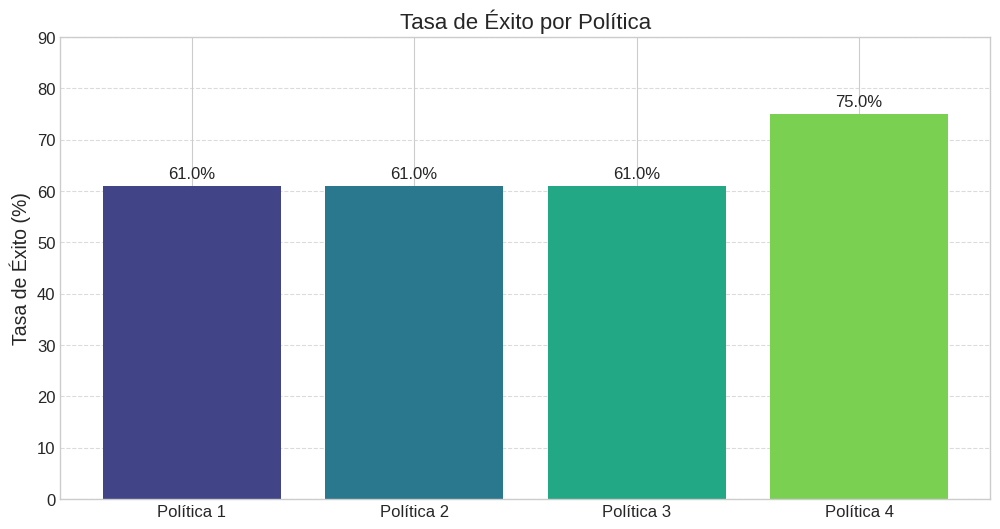

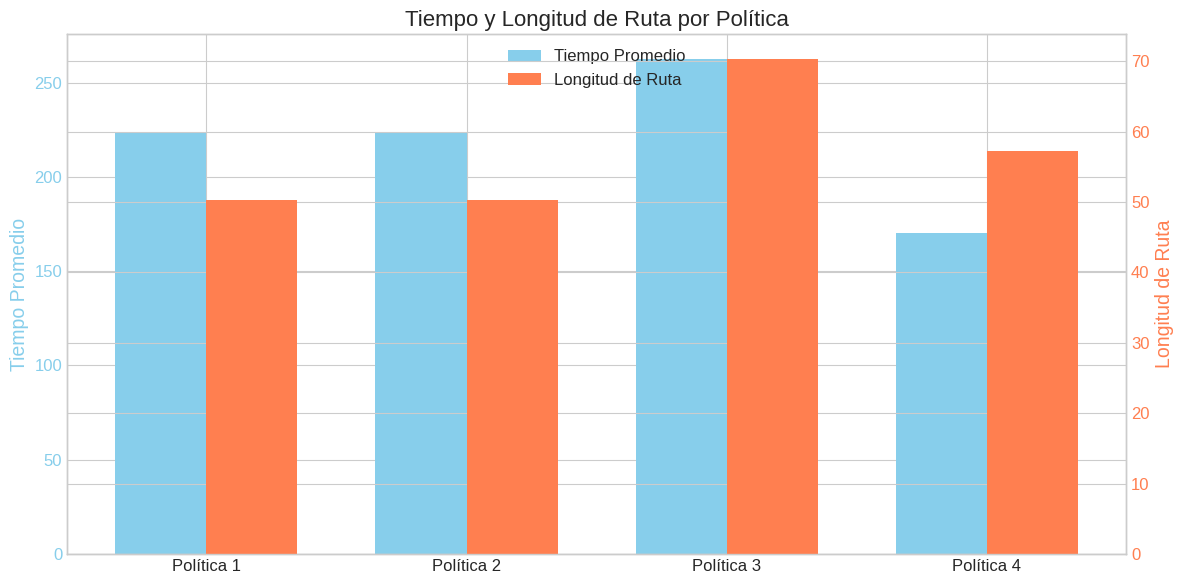

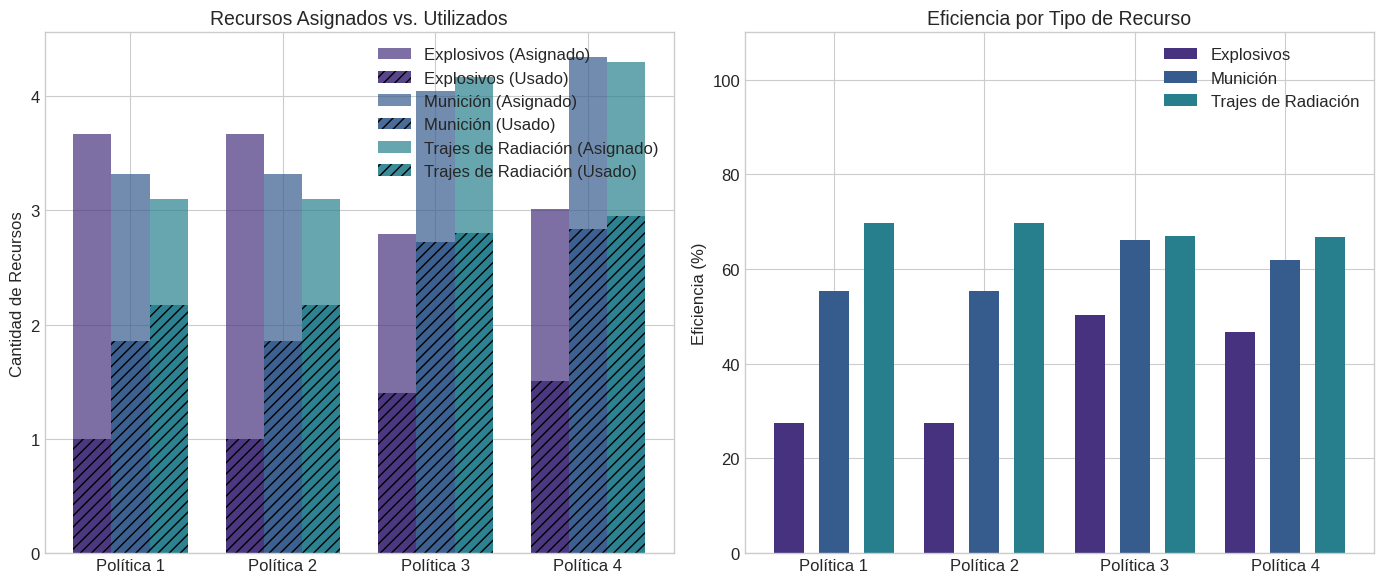

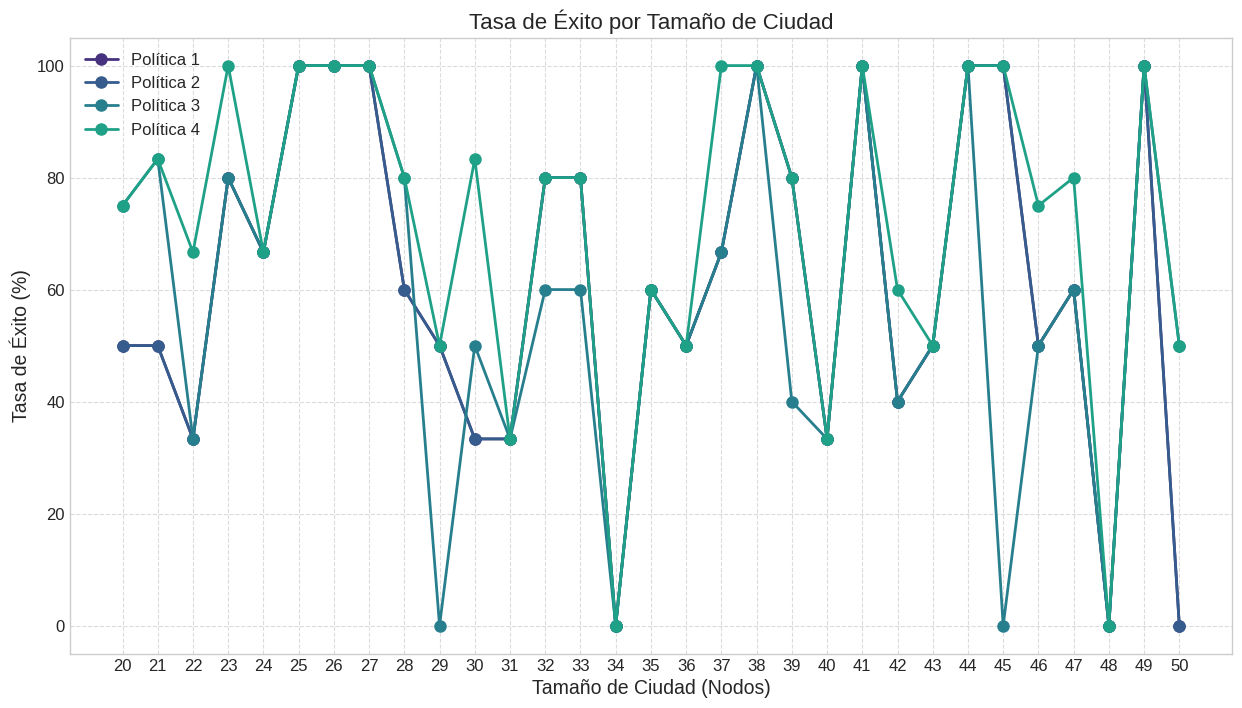

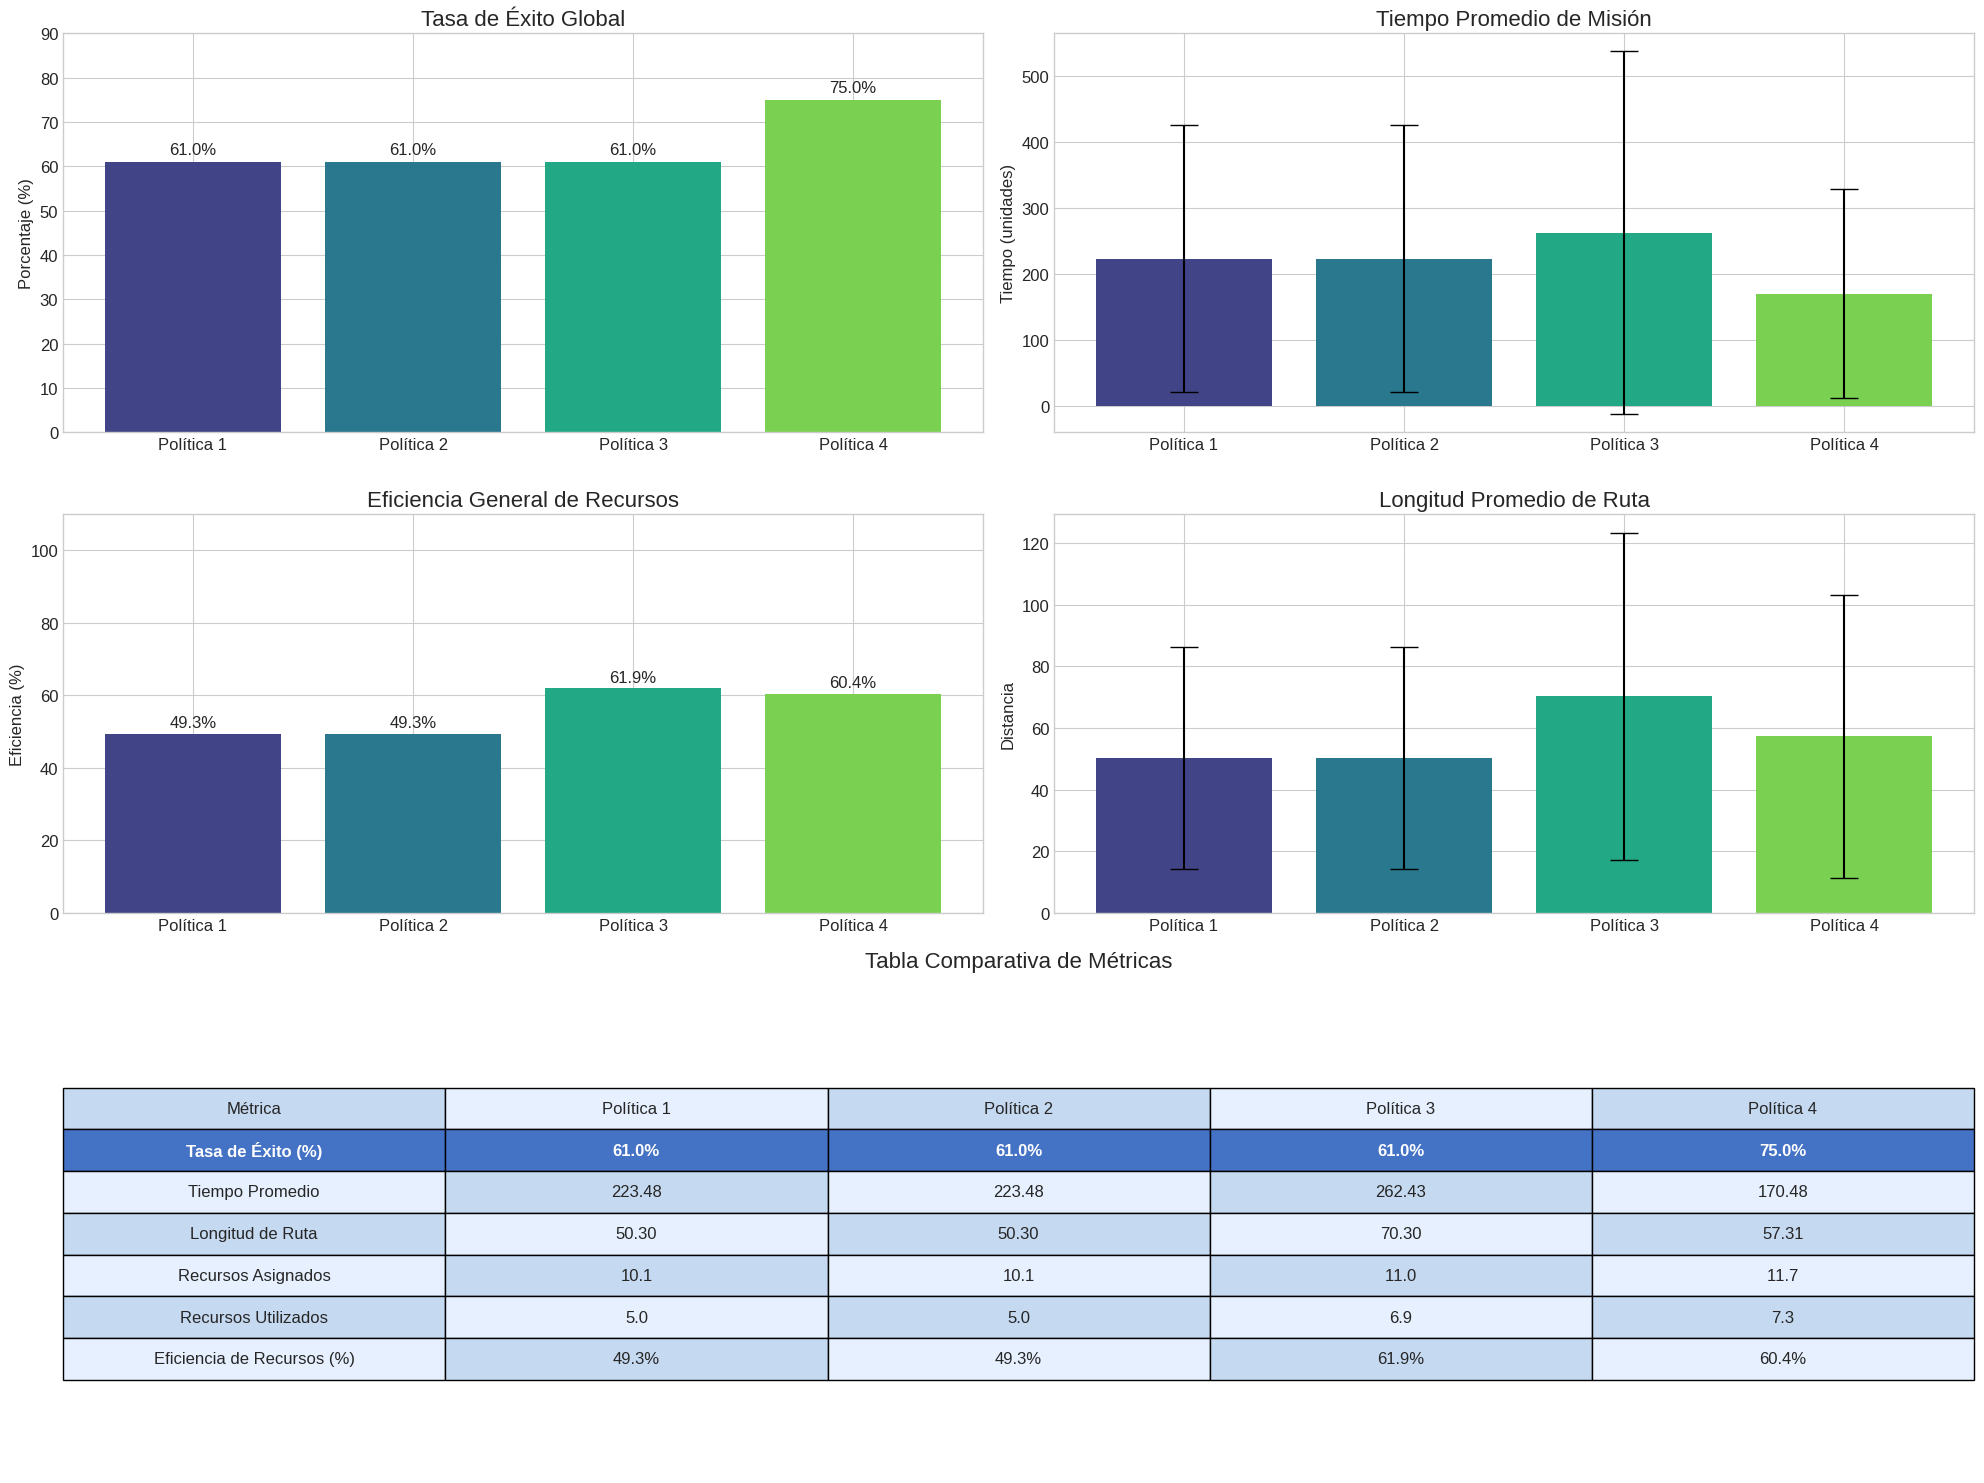

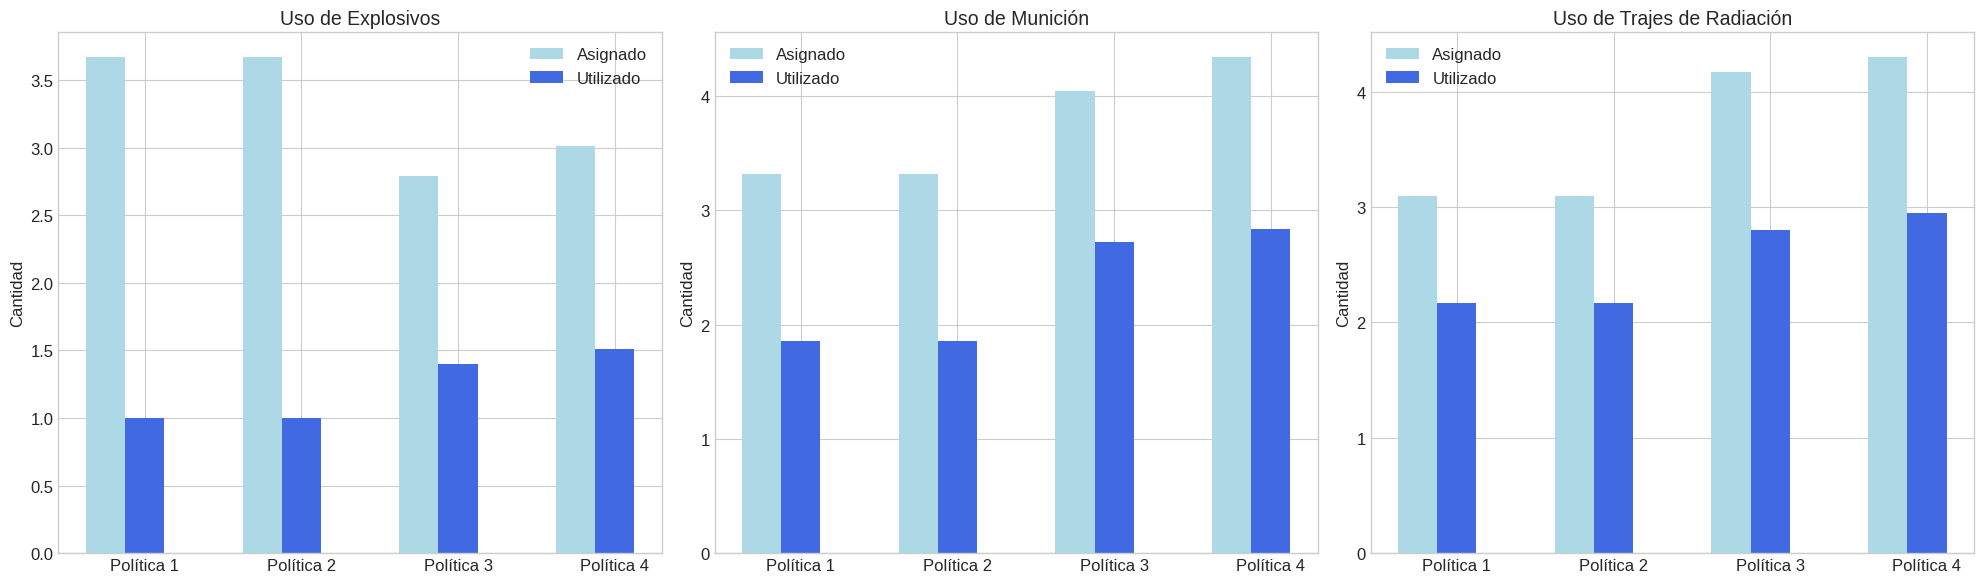

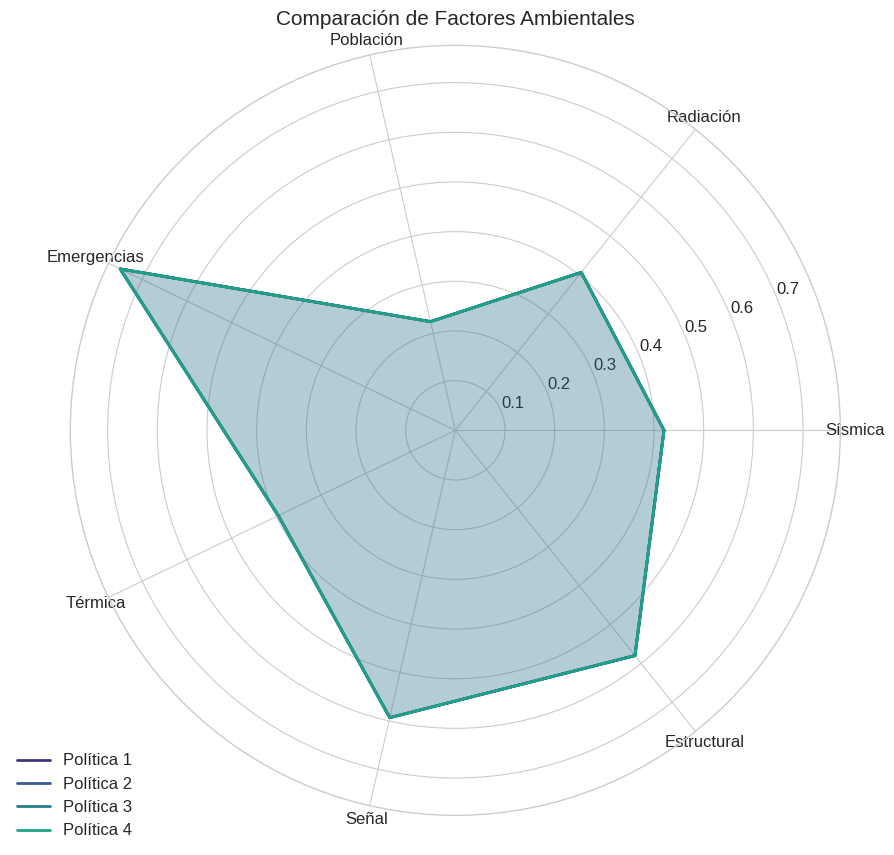

,Política,Tasa de Éxito (%),Tiempo Promedio,Longitud de Ruta,Recursos Asignados,Recursos Utilizados,Eficiencia de Recursos (%)
0,Política 1,61.0,223.48,50.30,10.1,5.0,49.3
1,Política 2,61.0,223.48,50.30,10.1,5.0,49.3
2,Política 3,61.0,262.43,70.30,11.0,6.9,61.9
3,Política 4,75.0,170.48,57.31,11.7,7.3,60.4


Análisis comparativo completo.


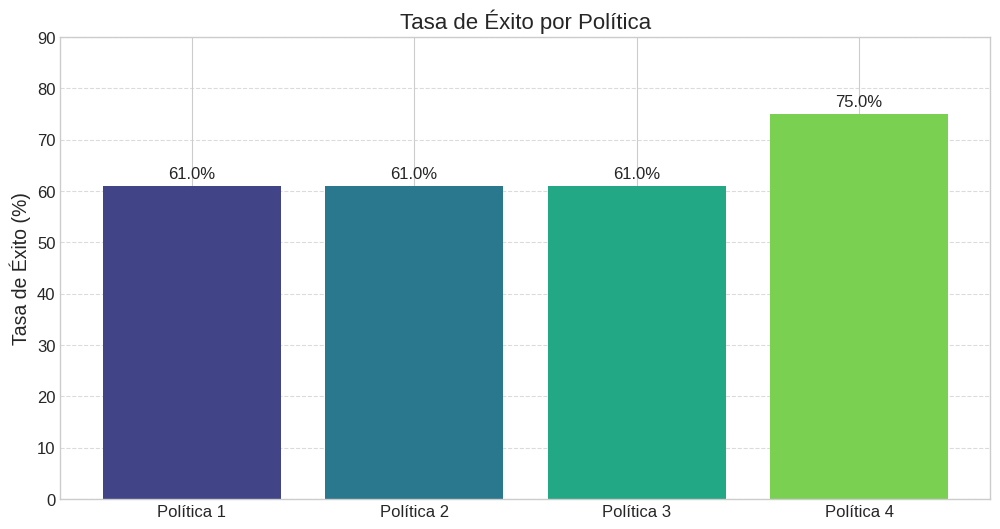

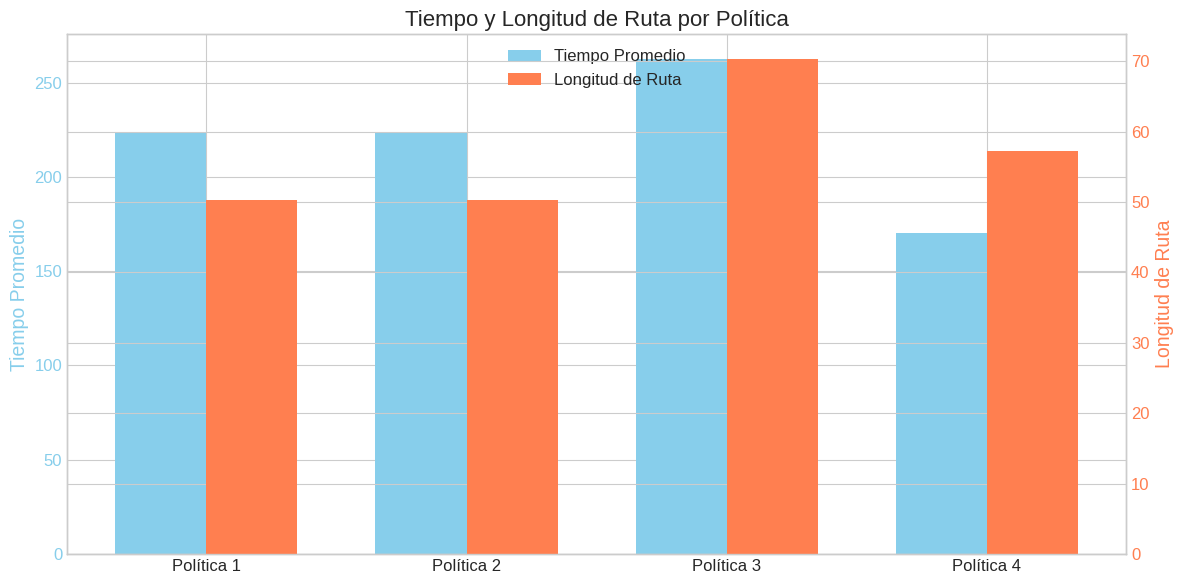

<Figure size 1400x700 with 0 Axes>

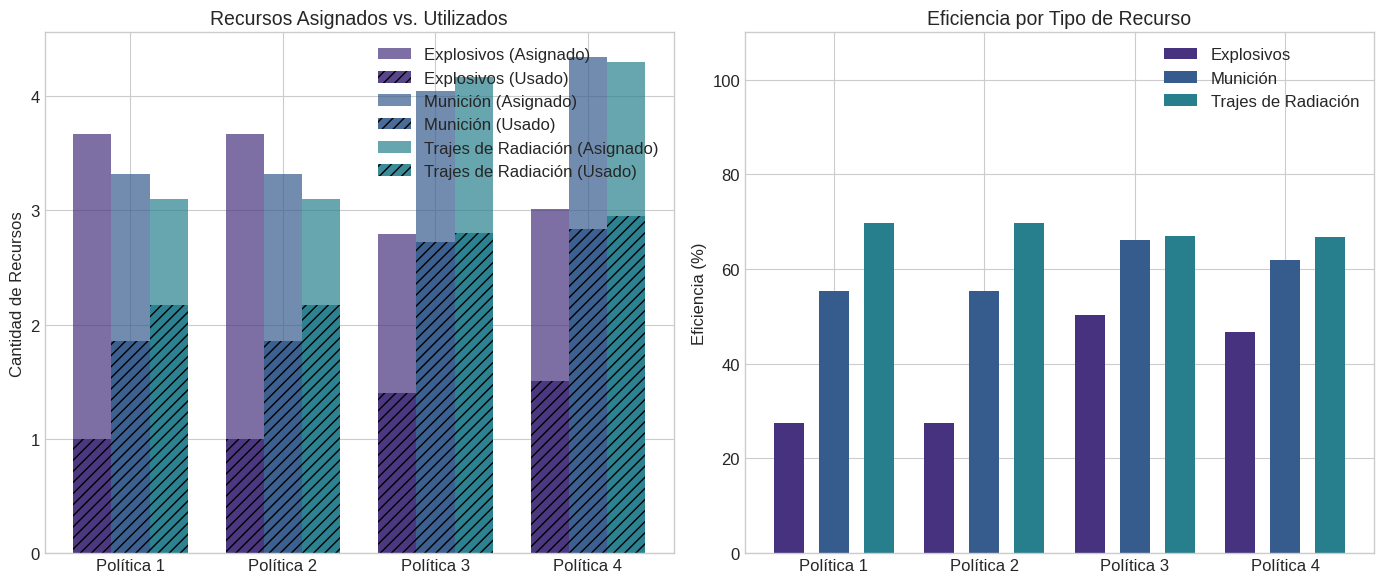

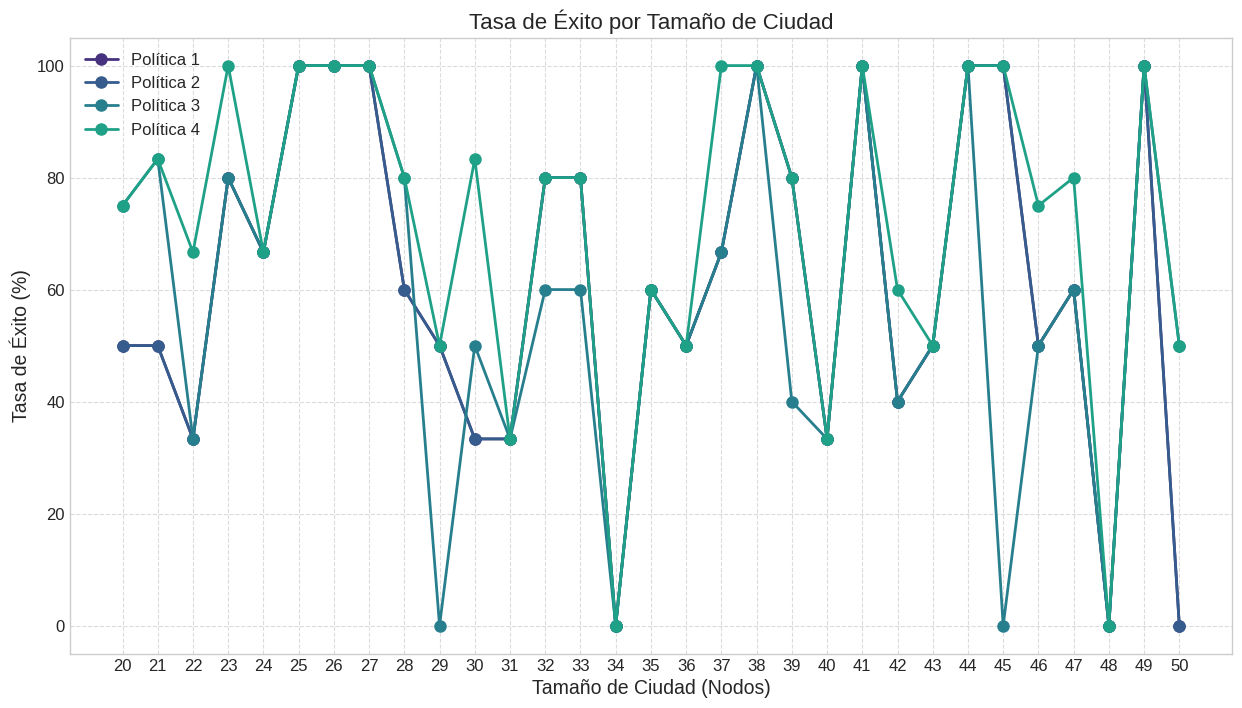

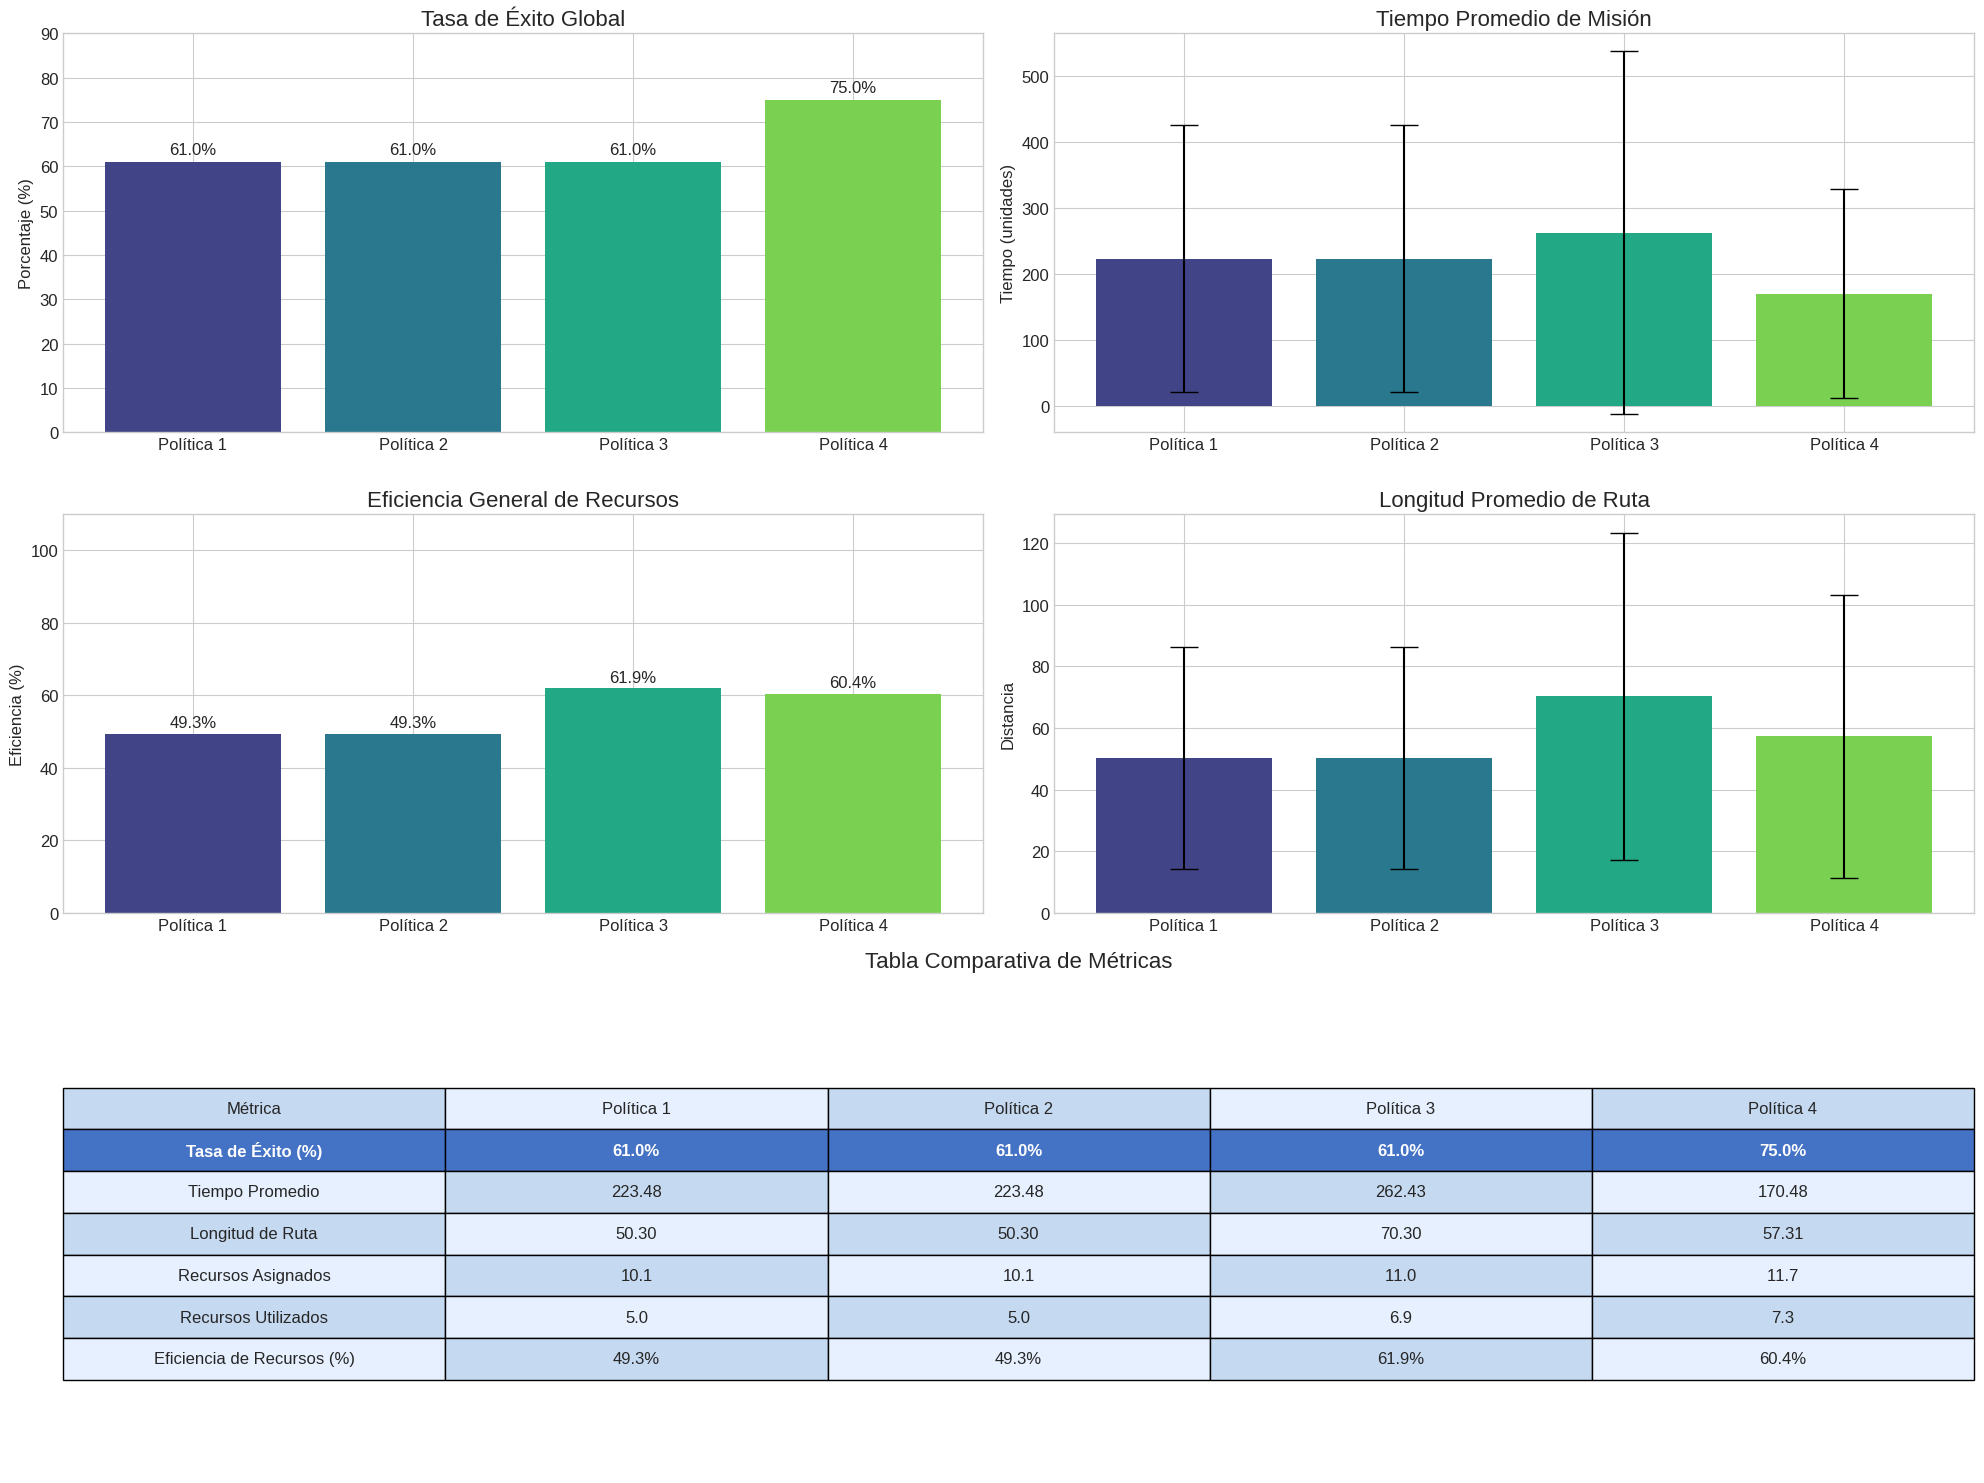

<Figure size 1500x1000 with 0 Axes>

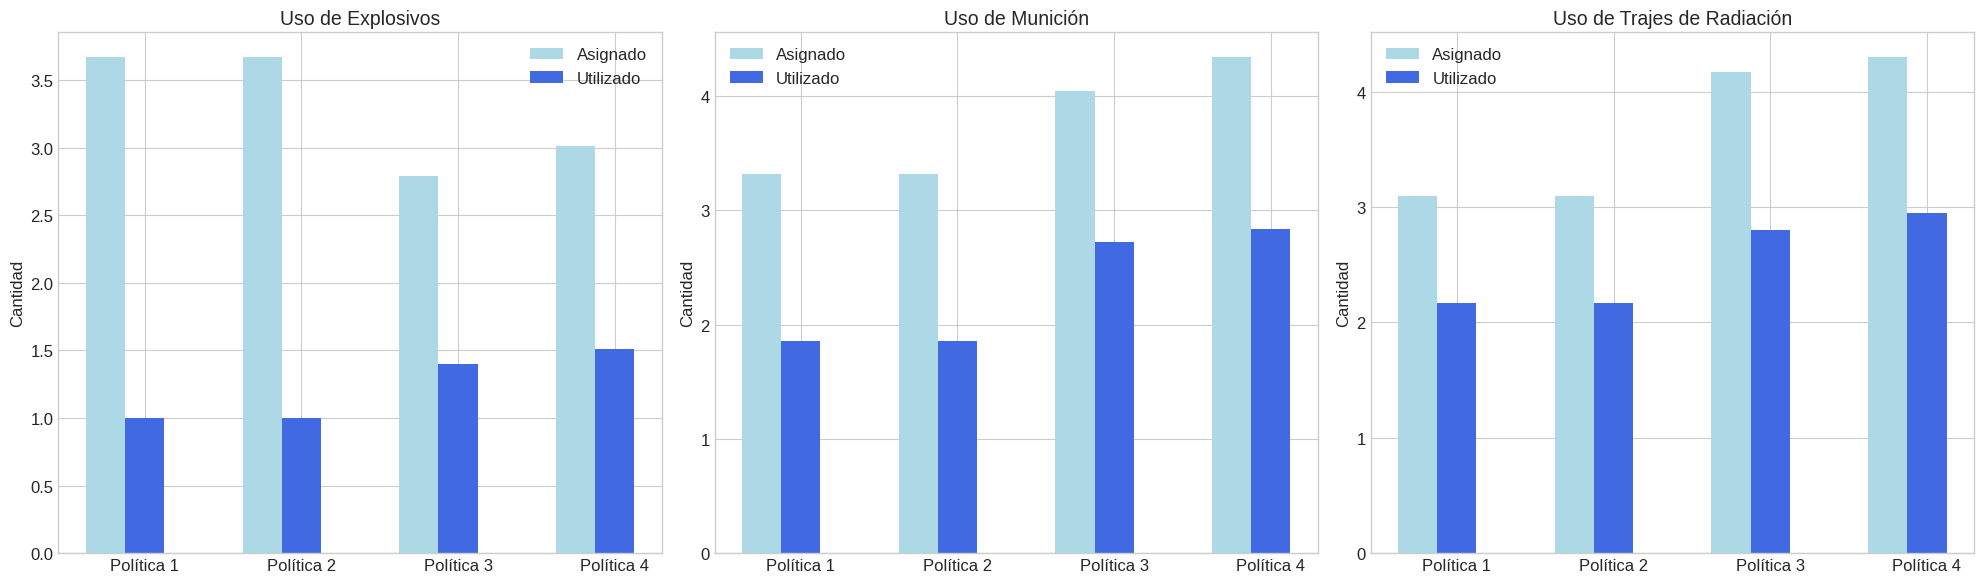

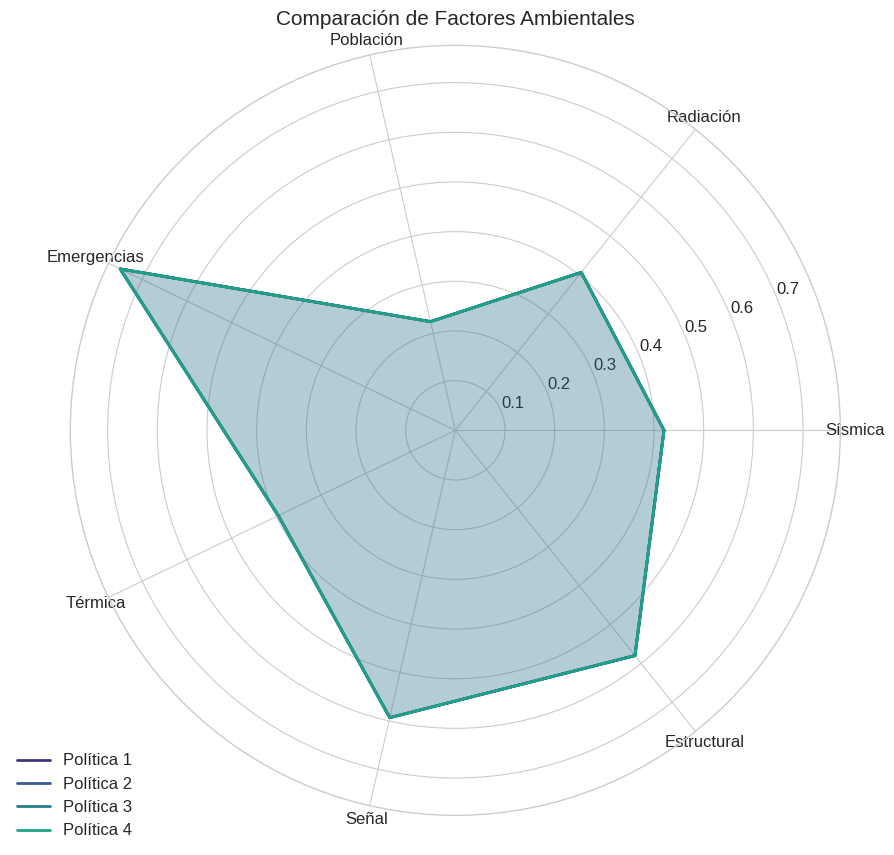

In [8]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Directorios de experimentos para cada política
experiment_dirs = [
    './data/policies/EvacuationPolicy/experiments/20250305_1232',  # Política 1
    './data/policies/EvacuationPolicy/experiments/20250305_1233',  # Política 2
    './data/policies/EvacuationPolicy/experiments/20250305_1235',  # Política 3
    './data/policies/EvacuationPolicy/experiments/20250305_1236',  # Política 4
]

policy_names = ['Política 1', 'Política 2', 'Política 3', 'Política 4']

# Función para cargar datos desde los archivos core_metrics.json
def load_experiment_data(experiment_dirs, policy_names):
    all_data = []
    
    for i, exp_dir in enumerate(experiment_dirs):
        try:
            with open(os.path.join(exp_dir, 'core_metrics.json'), 'r') as f:
                data = json.load(f)
                # Agregar el nombre de la política a los datos
                data['policy_name'] = policy_names[i]
                all_data.append(data)
                print(f"Datos cargados exitosamente para {policy_names[i]}")
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo para {policy_names[i]}")
            # Crear una entrada vacía para mantener el orden
            all_data.append({'policy_name': policy_names[i], 'error': 'Datos no disponibles'})
    
    return all_data

# Cargar todos los datos
policy_data = load_experiment_data(experiment_dirs, policy_names)

# Verificar que los datos estén disponibles
valid_policies = [p for p in policy_data if 'error' not in p]
if not valid_policies:
    raise ValueError("No hay datos válidos para ninguna política. Verifica las rutas de los experimentos.")

# 1. Comparación de tasas de éxito
def plot_success_rates(policy_data):
    """Graficar tasas de éxito para cada política"""
    plt.figure(figsize=(12, 6))
    
    success_rates = []
    labels = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        success_rate = data['overall_performance']['success_rate'] * 100
        success_rates.append(success_rate)
        labels.append(data['policy_name'])
    
    # Crear barras con colores para diferentes políticas
    bars = plt.bar(labels, success_rates, color=sns.color_palette('viridis', len(labels)))
    
    # Añadir etiquetas con valores
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.title('Tasa de Éxito por Política', fontsize=16)
    plt.ylabel('Tasa de Éxito (%)', fontsize=14)
    plt.ylim(0, max(success_rates) * 1.2 if success_rates else 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    return plt.gcf()

# 2. Comparación de tiempos y longitudes de ruta
def plot_time_and_path(policy_data):
    """Graficar tiempo promedio y longitud de ruta para cada política"""
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    times = []
    paths = []
    labels = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        avg_time = data['overall_performance']['avg_time']
        avg_path = data['overall_performance']['avg_path_length']
        times.append(avg_time)
        paths.append(avg_path)
        labels.append(data['policy_name'])
    
    # Gráfico para tiempos (eje y izquierdo)
    x = np.arange(len(labels))
    width = 0.35
    
    rects1 = ax1.bar(x - width/2, times, width, label='Tiempo Promedio', color='skyblue')
    ax1.set_ylabel('Tiempo Promedio', fontsize=14, color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # Añadir segundo eje Y para longitudes de ruta
    ax2 = ax1.twinx()
    rects2 = ax2.bar(x + width/2, paths, width, label='Longitud de Ruta', color='coral')
    ax2.set_ylabel('Longitud de Ruta', fontsize=14, color='coral')
    ax2.tick_params(axis='y', labelcolor='coral')
    
    # Añadir etiquetas y formato
    ax1.set_title('Tiempo y Longitud de Ruta por Política', fontsize=16)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    
    # Añadir leyenda
    fig.tight_layout()
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')
    
    return fig

# 3. Comparación de eficiencia de recursos
def plot_resource_efficiency(policy_data):
    """Graficar eficiencia de recursos para cada política"""
    plt.figure(figsize=(14, 7))
    
    # Recopilar datos para la gráfica
    resource_types = ['explosives', 'ammo', 'radiation_suits']
    resource_labels = ['Explosivos', 'Munición', 'Trajes de Radiación']
    
    policy_names = []
    allocated_data = []
    used_data = []
    efficiency_data = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        
        policy_names.append(data['policy_name'])
        policy_allocated = []
        policy_used = []
        policy_efficiency = []
        
        for rt in resource_types:
            if rt in data['resource_details']:
                policy_allocated.append(data['resource_details'][rt]['avg_allocated'])
                policy_used.append(data['resource_details'][rt]['avg_used'])
                policy_efficiency.append(data['resource_details'][rt]['efficiency'] * 100)
        
        allocated_data.append(policy_allocated)
        used_data.append(policy_used)
        efficiency_data.append(policy_efficiency)
    
    # Configurar subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Recursos asignados vs. utilizados
    x = np.arange(len(policy_names))
    width = 0.25
    
    # Gráfico de barras agrupadas para cada tipo de recurso
    for i, rt_label in enumerate(resource_labels):
        rt_allocated = [policy[i] for policy in allocated_data]
        rt_used = [policy[i] for policy in used_data]
        rt_efficiency = [policy[i] for policy in efficiency_data]
        
        positions = x + (i - 1) * width
        bars1 = ax1.bar(positions, rt_allocated, width, alpha=0.7, label=f'{rt_label} (Asignado)')
        bars2 = ax1.bar(positions, rt_used, width, alpha=0.9, label=f'{rt_label} (Usado)', 
                       color=[bar.get_facecolor() for bar in bars1], hatch='///')
    
    ax1.set_title('Recursos Asignados vs. Utilizados', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(policy_names)
    ax1.set_ylabel('Cantidad de Recursos', fontsize=12)
    ax1.legend()
    
    # 2. Eficiencia por tipo de recurso
    width2 = 0.2
    pos_adjust = np.linspace(-width2*1.5, width2*1.5, len(resource_labels))
    
    for i, rt_label in enumerate(resource_labels):
        rt_efficiency = [policy[i] for policy in efficiency_data]
        ax2.bar(x + pos_adjust[i], rt_efficiency, width2, label=rt_label)
    
    ax2.set_title('Eficiencia por Tipo de Recurso', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(policy_names)
    ax2.set_ylabel('Eficiencia (%)', fontsize=12)
    ax2.set_ylim(0, 110)  # Dejar espacio para valores y anotaciones
    ax2.legend()
    
    plt.tight_layout()
    
    return fig

# 4. Comparación de éxito por tamaño de ciudad
def plot_success_by_city_size(policy_data):
    """Graficar tasa de éxito por tamaño de ciudad para cada política"""
    plt.figure(figsize=(15, 8))
    
    # Recopilar datos para la gráfica
    all_sizes = set()
    policies_city_data = {}
    
    for data in policy_data:
        if 'error' in data or 'by_city_size' not in data:
            continue
        
        policy_name = data['policy_name']
        city_sizes = {}
        
        for size, size_data in data['by_city_size'].items():
            all_sizes.add(int(size))
            city_sizes[int(size)] = size_data['success_rate'] * 100
        
        policies_city_data[policy_name] = city_sizes
    
    # Ordenar tamaños de ciudad
    all_sizes = sorted(all_sizes)
    
    # Crear el gráfico
    for policy_name, city_data in policies_city_data.items():
        x_vals = []
        y_vals = []
        
        for size in all_sizes:
            if size in city_data:
                x_vals.append(size)
                y_vals.append(city_data[size])
        
        plt.plot(x_vals, y_vals, marker='o', linewidth=2, markersize=8, label=policy_name)
    
    plt.title('Tasa de Éxito por Tamaño de Ciudad', fontsize=16)
    plt.xlabel('Tamaño de Ciudad (Nodos)', fontsize=14)
    plt.ylabel('Tasa de Éxito (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Mejorar visualización del eje X
    plt.xticks(all_sizes)
    
    return plt.gcf()

# 5. Dashboard general de comparación
def create_dashboard(policy_data):
    """Crear dashboard comparativo completo"""
    plt.figure(figsize=(20, 15))
    gs = GridSpec(3, 2, height_ratios=[1, 1, 1.2])
    
    # 1. Tasa de éxito global
    ax1 = plt.subplot(gs[0, 0])
    labels = []
    success_rates = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        labels.append(data['policy_name'])
        success_rates.append(data['overall_performance']['success_rate'] * 100)
    
    bars = ax1.bar(labels, success_rates, color=sns.color_palette('viridis', len(labels)))
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    ax1.set_title('Tasa de Éxito Global', fontsize=16)
    ax1.set_ylabel('Porcentaje (%)')
    ax1.set_ylim(0, max(success_rates)*1.2 if success_rates else 100)
    
    # 2. Tiempo promedio y desviación estándar
    ax2 = plt.subplot(gs[0, 1])
    times = []
    std_times = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        times.append(data['overall_performance']['avg_time'])
        std_times.append(data['overall_performance']['std_time'])
    
    ax2.bar(labels, times, yerr=std_times, capsize=10, 
           color=sns.color_palette('viridis', len(labels)))
    
    ax2.set_title('Tiempo Promedio de Misión', fontsize=16)
    ax2.set_ylabel('Tiempo (unidades)')
    
    # 3. Eficiencia general de recursos
    ax3 = plt.subplot(gs[1, 0])
    efficiency = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        efficiency.append(data['overall_performance']['resource_efficiency'] * 100)
    
    bars = ax3.bar(labels, efficiency, color=sns.color_palette('viridis', len(labels)))
    
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    ax3.set_title('Eficiencia General de Recursos', fontsize=16)
    ax3.set_ylabel('Eficiencia (%)')
    ax3.set_ylim(0, 110)
    
    # 4. Longitud promedio de ruta
    ax4 = plt.subplot(gs[1, 1])
    paths = []
    std_paths = []
    
    for data in policy_data:
        if 'error' in data:
            continue
        paths.append(data['overall_performance']['avg_path_length'])
        std_paths.append(data['overall_performance']['std_path_length'])
    
    ax4.bar(labels, paths, yerr=std_paths, capsize=10,
           color=sns.color_palette('viridis', len(labels)))
    
    ax4.set_title('Longitud Promedio de Ruta', fontsize=16)
    ax4.set_ylabel('Distancia')
    
    # 5. Tabla comparativa
    ax5 = plt.subplot(gs[2, :])
    ax5.axis('off')
    
    table_data = []
    metrics = [
        'Tasa de Éxito (%)', 
        'Tiempo Promedio', 
        'Longitud de Ruta', 
        'Recursos Asignados',
        'Recursos Utilizados', 
        'Eficiencia de Recursos (%)'
    ]
    
    # Crear encabezados de la tabla
    column_labels = ['Métrica'] + labels
    rows = []
    
    # Añadir filas para cada métrica
    for i, metric in enumerate(metrics):
        row = [metric]
        for data in policy_data:
            if 'error' in data:
                row.append('N/A')
            else:
                if i == 0:  # Tasa de éxito
                    val = f"{data['overall_performance']['success_rate']*100:.1f}%"
                elif i == 1:  # Tiempo promedio
                    val = f"{data['overall_performance']['avg_time']:.2f}"
                elif i == 2:  # Longitud de ruta
                    val = f"{data['overall_performance']['avg_path_length']:.2f}"
                elif i == 3:  # Recursos asignados
                    val = f"{data['overall_performance']['resources_allocated']:.1f}"
                elif i == 4:  # Recursos utilizados
                    val = f"{data['overall_performance']['resources_used']:.1f}"
                elif i == 5:  # Eficiencia de recursos
                    val = f"{data['overall_performance']['resource_efficiency']*100:.1f}%"
                row.append(val)
        rows.append(row)
    
    # Crear tabla
    table = ax5.table(
        cellText=rows,
        colLabels=column_labels,
        loc='center',
        cellLoc='center',
        colWidths=[0.2] + [0.2] * len(labels)
    )
    
    # Formato de tabla
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    
    # Colorear filas de la tabla con colores alternados
    for i, key in enumerate(table._cells):
        cell = table._cells[key]
        if i < len(column_labels):  # Encabezados
            cell.set_facecolor('#4472C4')
            cell.set_text_props(color='white', fontweight='bold')
        elif i % 2:
            cell.set_facecolor('#E6F0FF')
        else:
            cell.set_facecolor('#C5D9F1')
    
    ax5.set_title('Tabla Comparativa de Métricas', fontsize=16, pad=20)
    
    plt.tight_layout()
    return plt.gcf()

# 6. Análisis de recursos por tipo
def plot_resource_usage(policy_data):
    """Graficar uso de recursos por tipo para cada política"""
    plt.figure(figsize=(15, 10))
    
    # Configurar subgráficos
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    resource_types = ['explosives', 'ammo', 'radiation_suits']
    resource_labels = ['Explosivos', 'Munición', 'Trajes de Radiación']
    
    for i, (rt, label) in enumerate(zip(resource_types, resource_labels)):
        ax = axes[i]
        
        labels = []
        allocated = []
        used = []
        needed = []
        
        for data in policy_data:
            if 'error' in data or 'resource_details' not in data:
                continue
            
            if rt in data['resource_details']:
                labels.append(data['policy_name'])
                allocated.append(data['resource_details'][rt]['avg_allocated'])
                used.append(data['resource_details'][rt]['avg_used'])
                
                # Intentar obtener needed (puede no estar disponible en todos los datos)
                if 'avg_needed' in data['resource_details'][rt]:
                    needed.append(data['resource_details'][rt]['avg_needed'])
        
        x = np.arange(len(labels))
        width = 0.25
        
        # Dibujar barras
        ax.bar(x - width, allocated, width, label='Asignado', color='lightblue')
        ax.bar(x, used, width, label='Utilizado', color='royalblue')
        
        if needed:
            ax.bar(x + width, needed, width, label='Necesario', color='darkblue')
        
        # Añadir títulos y etiquetas
        ax.set_title(f'Uso de {label}', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_ylabel('Cantidad', fontsize=12)
        ax.legend()
    
    plt.tight_layout()
    return fig

# 7. Gráfico de radar para factores ambientales
def plot_environmental_radar(policy_data):
    """Crear gráfico de radar para comparar factores ambientales entre políticas"""
    
    # Definir las categorías para el radar
    categories = [
        'Sísmica', 'Radiación', 'Población', 
        'Emergencias', 'Térmica', 'Señal', 'Estructural'
    ]
    
    # Recopilar datos para cada política
    policy_env_data = []
    policy_labels = []
    
    for data in policy_data:
        if 'error' in data or 'proxy_metrics' not in data:
            continue
        
        policy_labels.append(data['policy_name'])
        
        # Obtener valores promedio de los indicadores de nodos
        node_indicators = data['proxy_metrics']['nodes']
        values = [
            node_indicators['seismic_activity']['mean'],
            node_indicators['radiation_readings']['mean'],
            node_indicators['population_density']['mean'],
            node_indicators['emergency_calls']['mean'],
            node_indicators['thermal_readings']['mean'],
            node_indicators['signal_strength']['mean'],
            node_indicators['structural_integrity']['mean']
        ]
        
        # Asegurarse de que los valores completen el círculo
        policy_env_data.append(values)
    
    # Crear el gráfico de radar
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Calcular ángulos para cada categoría
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Cerrar el círculo
    
    # Dibujar cada política
    for i, (data, label) in enumerate(zip(policy_env_data, policy_labels)):
        data += data[:1]  # Cerrar el círculo para los datos
        ax.plot(angles, data, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, data, alpha=0.1)
    
    # Personalizar el gráfico
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title('Comparación de Factores Ambientales', size=15)
    ax.grid(True)
    
    # Añadir leyenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig

# 8. Métricas ambientales vs éxito
def plot_environment_vs_success(policy_data):
    """Visualizar correlación entre métricas ambientales y éxito de la misión"""
    plt.figure(figsize=(14, 8))
    
    # Recopilar correlaciones para cada política
    policy_correlations = {}
    
    for data in policy_data:
        if 'error' in data or 'environmental_metrics' not in data or 'correlations' not in data.get('environmental_metrics', {}):
            continue
        
        correlations = data['environmental_metrics']['correlations']
        node_corr = correlations.get('nodes', {})
        edge_corr = correlations.get('edges', {})
        
        # Combinar en un único diccionario
        all_corr = {}
        for k, v in node_corr.items():
            all_corr[f"Nodo: {k.replace('_', ' ').title()}"] = v
        for k, v in edge_corr.items():
            all_corr[f"Arista: {k.replace('_', ' ').title()}"] = v
        
        policy_correlations[data['policy_name']] = all_corr
    
    # Crear el gráfico
    if not policy_correlations:
        plt.text(0.5, 0.5, "No hay datos de correlación disponibles", ha='center', va='center')
        plt.axis('off')
        return plt.gcf()
    
    # Obtener todas las métricas (haciendo una unión de las claves)
    all_metrics = set()
    for corr in policy_correlations.values():
        all_metrics.update(corr.keys())
    all_metrics = sorted(all_metrics)
    
    # Preparar matriz de datos para heatmap
    corr_matrix = np.zeros((len(all_metrics), len(policy_correlations)))
    x_labels = list(policy_correlations.keys())
    
    for i, metric in enumerate(all_metrics):
        for j, policy in enumerate(x_labels):
            if metric in policy_correlations[policy]:
                corr_matrix[i, j] = policy_correlations[policy][metric]
    
    # Crear heatmap
    cmap = plt.cm.RdBu_r
    plt.figure(figsize=(12, len(all_metrics) * 0.4))
    
    # Normalizar para centrar en cero
    norm = plt.Normalize(-1, 1)
    
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, norm=norm,
               xticklabels=x_labels, yticklabels=all_metrics,
               linewidths=0.5)
    
    plt.title('Correlación entre Factores Ambientales y Éxito de Misión', fontsize=16)
    plt.tight_layout()
    
    return plt.gcf()

# Generar y mostrar todas las visualizaciones
print("Generando visualizaciones comparativas...")

# 1. Tasa de éxito global
success_plot = plot_success_rates(policy_data)
display(success_plot)

# 2. Tiempo y longitud de ruta
time_path_plot = plot_time_and_path(policy_data)
display(time_path_plot)

# 3. Eficiencia de recursos
resource_eff_plot = plot_resource_efficiency(policy_data)
display(resource_eff_plot)

# 4. Éxito por tamaño de ciudad
city_size_plot = plot_success_by_city_size(policy_data)
display(city_size_plot)

# 5. Dashboard comparativo
dashboard = create_dashboard(policy_data)
display(dashboard)

# 6. Uso de recursos por tipo
resource_usage_plot = plot_resource_usage(policy_data)
display(resource_usage_plot)

# 7. Factores ambientales (gráfico de radar)
radar_plot = plot_environmental_radar(policy_data)
display(radar_plot)

# Crear una tabla con las métricas principales
def create_metrics_table(policy_data):
    """Crear una tabla pandas con las métricas principales"""
    metrics = [
        'Tasa de Éxito (%)', 
        'Tiempo Promedio', 
        'Longitud de Ruta', 
        'Recursos Asignados',
        'Recursos Utilizados', 
        'Eficiencia de Recursos (%)',
        'Obstáculos Encontrados'
    ]
    
    table_data = []
    
    for data in policy_data:
        if 'error' in data:
            continue
            
        row = {
            'Política': data['policy_name'],
            'Tasa de Éxito (%)': f"{data['overall_performance']['success_rate']*100:.1f}",
            'Tiempo Promedio': f"{data['overall_performance']['avg_time']:.2f}",
            'Longitud de Ruta': f"{data['overall_performance']['avg_path_length']:.2f}",
            'Recursos Asignados': f"{data['overall_performance']['resources_allocated']:.1f}",
            'Recursos Utilizados': f"{data['overall_performance']['resources_used']:.1f}",
            'Eficiencia de Recursos (%)': f"{data['overall_performance']['resource_efficiency']*100:.1f}"
        }
        
        table_data.append(row)
    
    df = pd.DataFrame(table_data)
    
    # Aplicar estilo
    styled_df = df.style.background_gradient(subset=['Tasa de Éxito (%)'], cmap='YlGn')
    
    return styled_df

# Mostrar tabla de métricas
metrics_table = create_metrics_table(policy_data)
display(metrics_table)

print("Análisis comparativo completo.")